# BMEN 509 - Lab 1 Tutorial
This document is a job aid for the handwritten notes matching the same description. The notes will refer specifically to headings in this notebook to match theory with implementation.

Created by Bryce Besler (babesler@ucalgary.ca), last edited January 9th, 2019

## Notebook Setup

In [1]:
# Library Imports
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy import signal, ndimage

# Setup Jupyter notebook specifics
%matplotlib inline

# Numpy printing help
np.set_printoptions(precision=2)

In [2]:
# Constants
data_directory = os.path.join('.', 'Data')
file_names = [
    'BreastUltrasound5.tif', 'T1Weighted8.jpg',
    'Thorax_PD.png', 'calcs_grids.tiff',
    'knee_ct2.tif', 'knee_xray2.tif',
    'mri_T2.tif', 'mri_brain.tif',
    'mri_pd.tif'
]

In [4]:
# Verify we can find our files
for file_name in file_names:
    name = os.path.join(data_directory, file_name)
    if not os.path.isfile(name):
        os.sys.exit('Cannot find file {}. Please make sure you have downloaded the data'.format(name))
print('Found all image files!')

Found all image files!


### Example 1 - Image Representation
Below, we are demonstrating the basics of image representation including creating, plotting, etc. For all our work, we will be using Numpy arrays. They are similar to MATLAB tensors except they are zero indexed. MATLAB starts counting from 1, Numpy starts counting from 0.

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
The size of the image is: (3, 3)
There are 9 pixels in the image
Value at index (1, 2) is 0.0


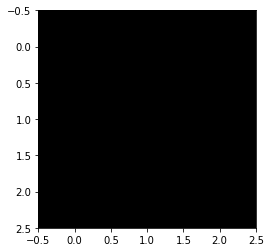

In [5]:
# Let's create a 2D image of size 3x3 with all zeros
I = np.zeros((3,3))

# We can print the contents of the image
print(I)

# We can ask the size
print('The size of the image is: {}'.format(I.shape))

# We can ask for the number of pixels
N = np.prod(I.shape)
print('There are {} pixels in the image'.format(N))

# Next, we can ask for the value at an index
print('Value at index ({}, {}) is {}'.format(1, 2, I[1,2]))

# And finally, we can show the image!
plt.imshow(I, cmap='gray')
plt.show()

In [6]:
# We can also create 3D images
J = np.zeros((3,4,5))

print('Image J has size {}'.format(J.shape))
print('Image J has dimensions {}'.format(len(J.shape)))

Image J has size (3, 4, 5)
Image J has dimensions 3


Reading image ./Data/mri_T2.tif
Image ./Data/mri_T2.tif has:
  65536 pixels
  size (256, 256)
  data type uint8
  dimensionality 2


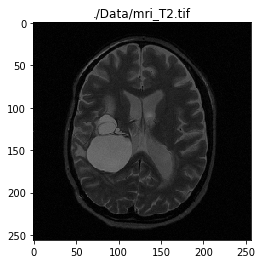

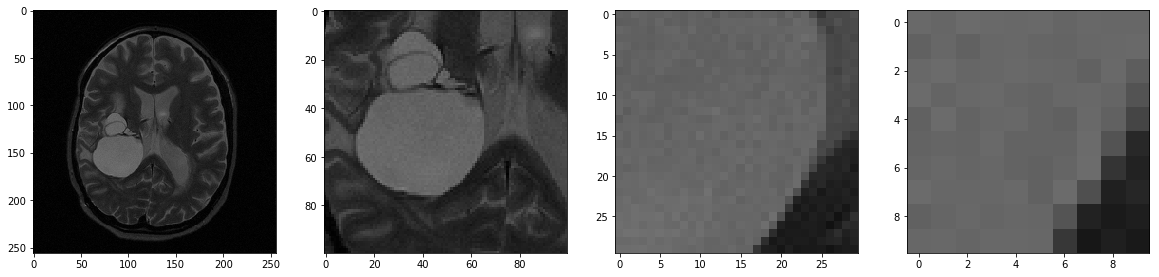

In [7]:
# Finally, we can load in images from disk. Let's load the image 'mri_T2.tif'
filename = os.path.join(data_directory, 'mri_T2.tif')

print('Reading image {}'.format(filename))
I = io.imread(filename)

# Let's the properties!
print('Image {} has:'.format(filename))
print('  {} pixels'.format(np.prod(I.shape)))
print('  size {}'.format(I.shape))
print('  data type {}'.format(np.dtype(I[0,0])))
print('  dimensionality {}'.format(len(I.shape)))

# Let's see the image!
plt.imshow(I, cmap='gray')
plt.title(filename)
plt.show()

# Let's take sub-images and see the pixelation!
plt.subplots(1, 4, figsize=(20,10))
plt.subplot(1, 4, 1); plt.imshow(I, cmap='gray', vmin=np.min(I[:]), vmax=np.max(I[:]))
plt.subplot(1, 4, 2); plt.imshow(I[100:200:1, 50:150:1], cmap='gray', vmin=np.min(I[:]), vmax=np.max(I[:]))
plt.subplot(1, 4, 3); plt.imshow(I[140:170:1, 90:120:1], cmap='gray', vmin=np.min(I[:]), vmax=np.max(I[:]))
plt.subplot(1, 4, 4); plt.imshow(I[155:165:1, 105:115:1], cmap='gray', vmin=np.min(I[:]), vmax=np.max(I[:]))
plt.show()

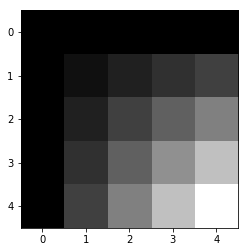

Pixel at (3, 2) has value 6.0
Pixel at (2, 3) has value 6.0
Pixel at (3, 3) has value 9.0


In [8]:
# Finally, let's create an image where every voxel is the product of the indicies
size = (5, 5)
J = np.zeros(size)

# We loop over all indicies
for i in range(size[0]):
    for j in range(size[1]):
        J[i, j] = i*j

# We can now plot
plt.imshow(J, cmap='gray')
plt.show()

# Did it work?
print('Pixel at ({}, {}) has value {}'.format(3, 2, J[3,2]))
print('Pixel at ({}, {}) has value {}'.format(2, 3, J[2,3]))
print('Pixel at ({}, {}) has value {}'.format(3, 3, J[3,3]))

### Example 2 - Images and Math
We can do simple math operators on images. Let's see how that works.

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


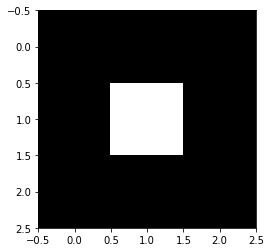

Mean of the image: 0.1111111111111111
STD of the image: 0.31426968052735443
Unbiased STD of the image 0.3333333333333333


In [9]:
# Let's get our example image up
I = np.zeros((3,3))
I[1,1]=1
print(I)

plt.imshow(I, cmap='gray')
plt.show()

print('Mean of the image: {}'.format(np.mean(I)))
print('STD of the image: {}'.format(np.std(I)))

# Notice that we got 0.314 instead of 0.33! Numpy uses the biased version of standard deviation. Let's fix that.

N = np.prod(I.shape)
print('Unbiased STD of the image {}'.format(np.sqrt(N / (N-1) * np.std(I)**2)))

# I'm sure you can figure out STD from here :)

In [10]:
# Finally, let's look for our contrast to noise ratio.
I_a = I[1,1]
I_b = I[2, 1]
contrast = np.abs(I_a - I_b)

print('Contrast between index A=({}, {}) and B=({}, {}) is |{} - {}| = {}'.format(1, 1, 2, 1, I_a, I_b, contrast))

# Now contrast to noise ratio shouldn't be so hard!

Contrast between index A=(1, 1) and B=(2, 1) is |1.0 - 0.0| = 1.0


[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


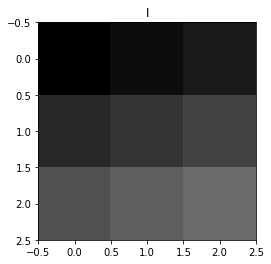

[[ 2.  4.  6.]
 [ 8. 10. 12.]
 [14. 16. 18.]]


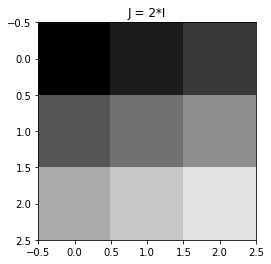

In [11]:
# Finally, we can do some math. Let's create the example from the page.
I = np.zeros((3,3))

count = 1
for i in range(I.shape[0]):
    for j in range(I.shape[1]):
        I[i, j] = count
        count += 1
        
print(I)
plt.imshow(I, cmap='gray', vmax=20)
plt.title('I')
plt.show()

J = 2*I
print(J)
plt.imshow(J, cmap='gray', vmax=20)
plt.title('J = 2*I')
plt.show()

### Example 3 - Histograms and Transformations
Below, we're going to demonstrate some histograms.

Reading image ./Data/mri_pd.tif


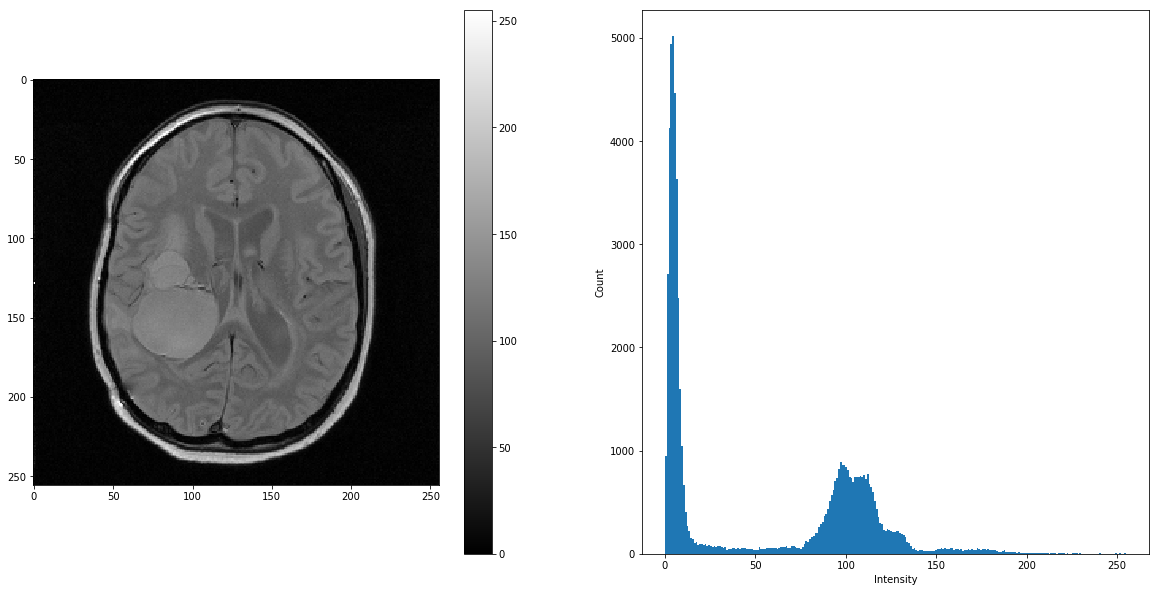

In [12]:
# First, let's just get a histogram plotting for image 'mri_pd.tif'
filename = os.path.join(data_directory, 'mri_pd.tif')

print('Reading image {}'.format(filename))
I = io.imread(filename)

plt.subplots(1, 2, figsize=(20,10))
plt.subplot(1, 2, 1); plt.imshow(I, cmap='gray'); plt.colorbar()
plt.subplot(1, 2, 2); plt.hist(I.ravel(), bins=256); plt.xlabel('Intensity'); plt.ylabel('Count')
plt.show()

# Which tissues correspond to where in the histogram?

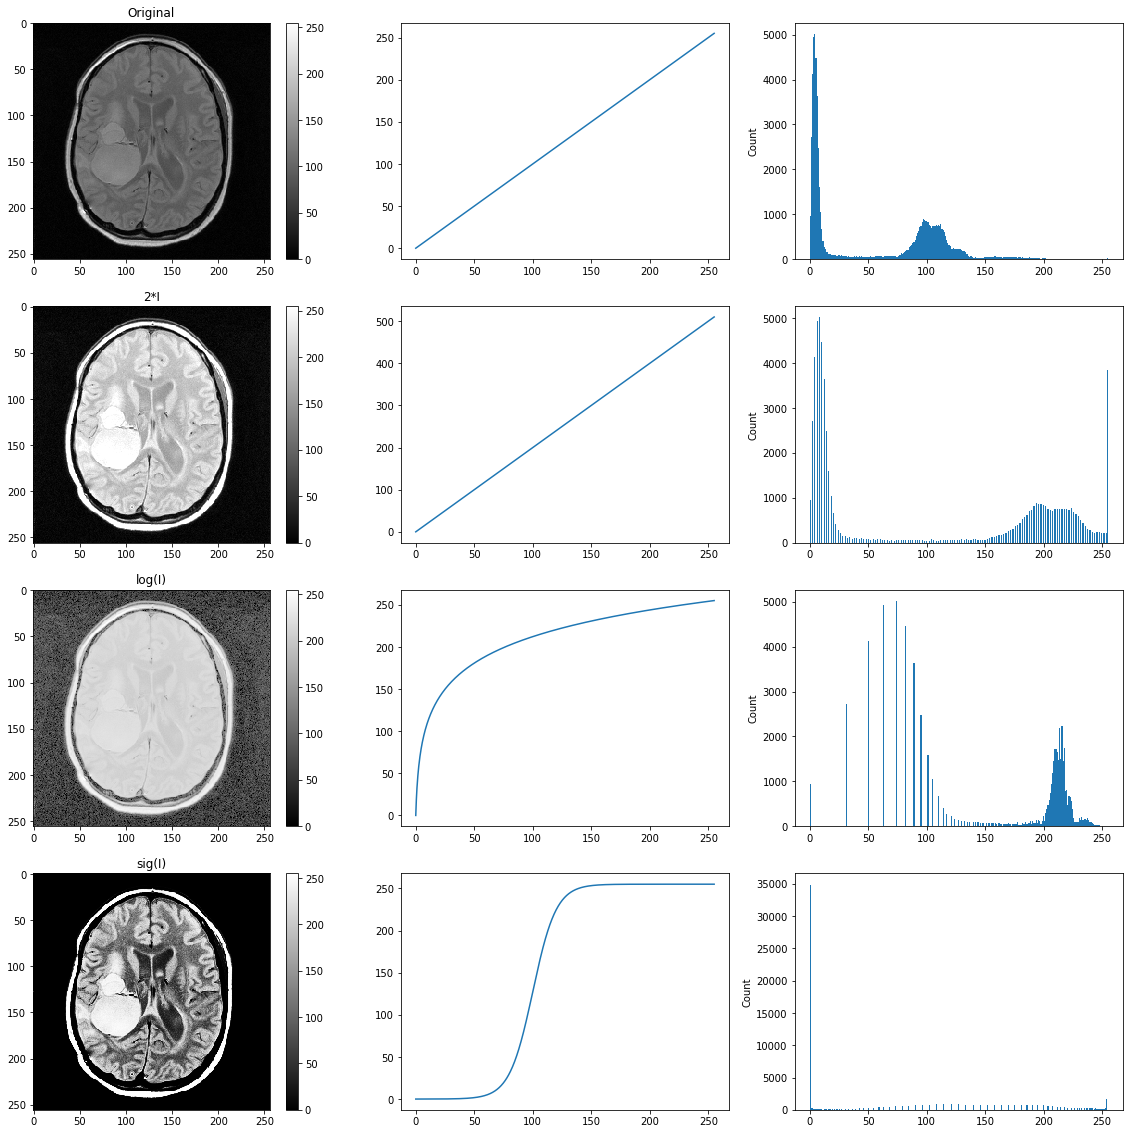

In [13]:
# Now, let's define some transfer functions!
def identity(J):
    return J

def mult_tf(J, multiple=2):
    return multiple*J

def log_tf(J, epsilon=1):
    K = np.log(J + epsilon*np.ones_like(J))
    return 255 * K / np.max(K[:])

def sig_tf(J, alpha=-0.1, beta=-100):
    K = 1.0 / (1 + np.exp(alpha*(J + beta)))
    return 255 * K / np.max(K[:])

# Let's define a plotting function
size = (4,3)
def apply_and_plot(J, func, name, count):
    # Apply function
    mi = np.min(J[:])
    ma = np.max(J[:])
    K = np.clip(func(J.astype(np.float32)), 0, 255).astype(np.uint8)
    x = np.linspace(mi, ma, 1000)
    y = func(x)
    
    # Plot Image
    plt.subplot(size[0], size[1], 3*(count-1)+1)
    plt.imshow(K, cmap='gray', vmin=mi, vmax=ma)
    plt.colorbar()
    plt.title(name)
    
    # Plot transfer function
    plt.subplot(size[0], size[1], 3*(count-1)+1+1)
    plt.plot(x,y)
    
    # Plot histogram
    plt.subplot(size[0], size[1], 3*(count-1)+1+2)
    plt.hist(K.ravel(), bins=256)
    plt.ylabel('Count')    

I_2 = 2*I
I_log = np.log(I+[1])
I_sig = 1 / (1 + np.exp(-0.1*(I - 100)))

# ... and see what we get
plt.subplots(size[0], size[1], figsize=(20,20))
apply_and_plot(I, identity, 'Original', 1)
apply_and_plot(I, mult_tf, '2*I', 2)
apply_and_plot(I, log_tf, 'log(I)', 3)
apply_and_plot(I, sig_tf, 'sig(I)', 4)
plt.show()

### Example 4 - Image Convolution
No one explains it better than the example at: http://setosa.io/ev/image-kernels/ Below, a small example is available for the purpose of demonstrating the laboratory.

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


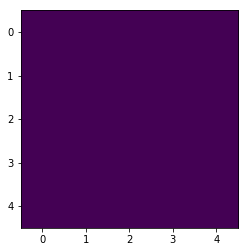

Reading image ./Data/mri_pd.tif


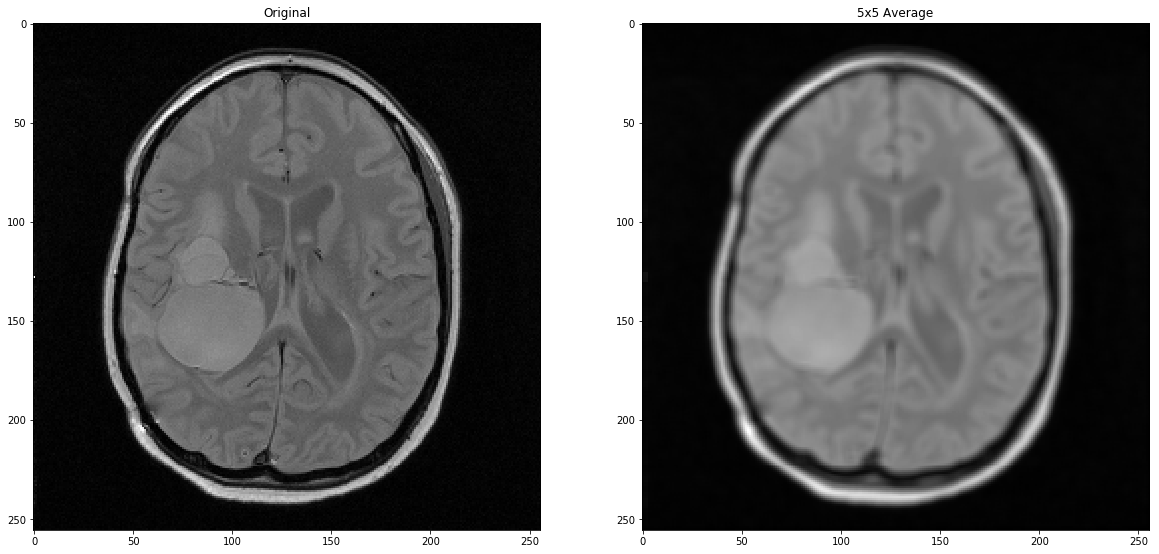

In [14]:
# Let's create our own averaging filter!
kernel = np.ones((5,5))
kernel = kernel / np.sum(kernel.ravel())

print(kernel)
plt.imshow(kernel)
plt.show()

# Read in our favorite PD image
filename = os.path.join(data_directory, 'mri_pd.tif')

print('Reading image {}'.format(filename))
I = io.imread(filename)

# Perform convolution
K = signal.convolve2d(I, kernel, boundary='pad', mode='same')

plt.subplots(1, 2, figsize=(20,20))
plt.subplot(1, 2, 1); plt.imshow(I, cmap='gray'); plt.title('Original')
plt.subplot(1, 2, 2); plt.imshow(K, cmap='gray'); plt.title('5x5 Average')
plt.show()